# Imports

In [119]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [120]:
import sklearn
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Getting Dataframe from Data

In [121]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Prepared_for_ML_Data.csv'
player_balls = pd.read_csv(path)

In [122]:
player_balls.head()

,Unnamed: 0,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [123]:
# Removing the Unnamed: 0 column
player_balls.drop(['Unnamed: 0'], axis = 1, inplace = True)
player_balls.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Random Forest Classification

### Breaking Data into Training and Testing

In [124]:
# Splitting the data randomly between the 4 variables
# Need to drop Out column from X_train and X_test since that's what we are going to predict
# Test size is 0.2 because we want the testing data to be 20% of the original data
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

### Finding Best Model using ROC_AUC

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [126]:
model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(train_features, train_result)
probs_LR = model_LR.predict_proba(test_features)[:, 1]

In [127]:
model_DT = DecisionTreeClassifier()
model_DT.fit(train_features, train_result)
probs_DT = model_DT.predict_proba(test_features)[:, 1]

In [128]:
model_RF = RandomForestClassifier()
model_RF.fit(train_features, train_result)
probs_RF = model_RF.predict_proba(test_features)[:, 1]

In [129]:
auc_LR = roc_auc_score(test_result, probs_LR)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(test_result, probs_LR)

auc_DT = roc_auc_score(test_result, probs_DT)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(test_result, probs_DT)

auc_RF = roc_auc_score(test_result, probs_RF)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(test_result, probs_RF)

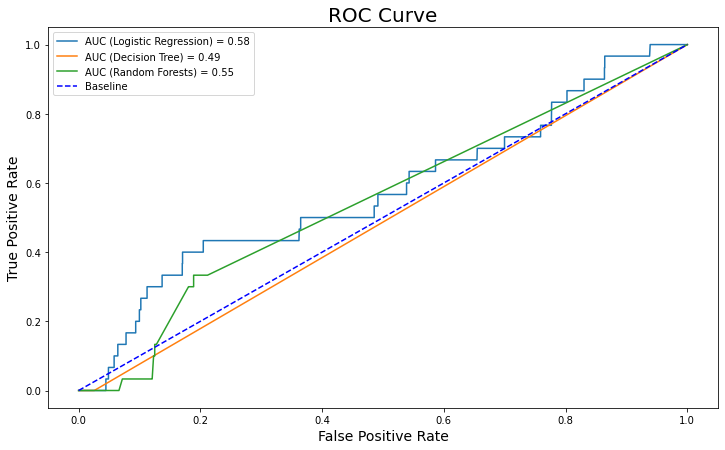

In [130]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_LR, tpr_LR, label=f'AUC (Logistic Regression) = {auc_LR:.2f}')
plt.plot(fpr_DT, tpr_DT, label=f'AUC (Decision Tree) = {auc_DT:.2f}')
plt.plot(fpr_RF, tpr_RF, label=f'AUC (Random Forests) = {auc_RF:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Training

In [131]:
# n_estimators determines the number of trees you want to use
# n_estimators should be max 50 so you have to determine the sweet spot
model_RF = RandomForestClassifier(random_state = 42)

In [132]:
model_RF.fit(train_features, train_result)

RandomForestClassifier(random_state=42)

### Testing

In [133]:
prediction_test_RF = model_RF.predict(test_features)

### Evaluation

In [134]:
print("*********** METRICS FOR IMBALANCED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR IMBALANCED DATA ***********
Accuracy =  0.983440662373505

Confusion Matrix:
 [[2138    6]
 [  30    0]]
Not out accuracy =  0.9861623616236163
Out accuracy =  0.0

ROC_AUC Score:
0.5220771144278605


# Using Techniques to Balance the Data

In [135]:
# There is a huge imbalance between the number of 0s and 1s the model predicted
print(player_balls['Out'].value_counts())

0    10721
1      146
Name: Out, dtype: int64


### 1) Oversampling Minority Training Data

Note that we are only going to first split the data into train and test before oversampling. This is because if we oversample before, then some data later in the training set will be identical to the some data in the test set which can cause overfitting.

Also, we are only going to oversample the training set because oversampling testing data can misrepresent the original test data. Therefore, you shouldn't generally be touching your test data.

In [136]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [137]:
from imblearn.over_sampling import RandomOverSampler

In [138]:
ros = RandomOverSampler(random_state = 42)
train_features, train_result = ros.fit_resample(train_features, train_result)

print(train_result.value_counts())

0    8577
1    8577
Name: Out, dtype: int64


In [139]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [140]:
print("*********** METRICS FOR OVERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR OVERSAMPLED DATA ***********
Accuracy =  0.9655013799448022

Confusion Matrix:
 [[2099   45]
 [  30    0]]
Not out accuracy =  0.9859088774072334
Out accuracy =  0.0

ROC_AUC Score:
0.5694651741293532


### 2) Undersample Majority Training Data

In [141]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [142]:
from imblearn.under_sampling import RandomUnderSampler

In [143]:
rus = RandomUnderSampler(random_state = 42)
train_features, train_result = rus.fit_resample(train_features, train_result)

print(train_result.value_counts())

0    116
1    116
Name: Out, dtype: int64


In [144]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [145]:
print("*********** METRICS FOR UNDERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR UNDERSAMPLED DATA ***********
Accuracy =  0.5354185832566697

Confusion Matrix:
 [[1144 1000]
 [  10   20]]
Not out accuracy =  0.9913344887348353
Out accuracy =  0.0196078431372549

ROC_AUC Score:
0.5849657960199004


### 3) Both Oversample and Undersample the Training Data

In [146]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [147]:
# Oversampling the minority class until it is 20% of the majority class data
ros = RandomOverSampler(sampling_strategy = 0.1, random_state = 42)
train_features, train_result = ros.fit_resample(train_features, train_result)

# Undersampling the majority class
rus = RandomUnderSampler()
train_features, train_result = rus.fit_resample(train_features, train_result)

train_result.value_counts()

0    857
1    857
Name: Out, dtype: int64

In [148]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [149]:
print("*********** METRICS FOR OVERSAMPLED AND UNDERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR OVERSAMPLED AND UNDERSAMPLED DATA ***********
Accuracy =  0.9001839926402944

Confusion Matrix:
 [[1954  190]
 [  27    3]]
Not out accuracy =  0.9863705199394245
Out accuracy =  0.015544041450777202

ROC_AUC Score:
0.5547419154228855


### 4) Penalize Learning Algorithms more for mistakes on Minority Classes

In [150]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [151]:
model_RF = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [152]:
print("*********** METRICS FOR PENALIZED ALGORITHM ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR PENALIZED ALGORITHM ***********
Accuracy =  0.9714811407543699

Confusion Matrix:
 [[2112   32]
 [  30    0]]
Not out accuracy =  0.9859943977591037
Out accuracy =  0.0

ROC_AUC Score:
0.580185012437811
